# Clinical Trial Analysis

![Laboratory Image](images/Laboratory.jpg)

In this demonstration, I will analyze clinical trial data to determine the effects of four potential squamous cell carcinoma drugs.

Data from a fictional animal study can be found in the input data folder. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. The objective of the analysis will be to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

In order to compare the drugs' effects, we will:


 - Create a scatter plot that shows how the tumor volume changes over time for each treatment.
 - Create a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
 - Create a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
 - Create a bar graph that compares the total % tumor volume change for each drug across the full 45 days.


As final considerations:


 - We will include error bars (SEM) in the plots. This will allow the company to account for variability between mice. 
 - We will indicate tumor growth as red and tumor reduction as green in the bar graph.
 - We will also include a label with the percentage change for each bar.

### Import dependencies:

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load ```.csv```s

In [261]:
# create dataframes from csv files
trial_csv = pd.read_csv('input_data/clinicaltrial_data.csv')
mouse_csv = pd.read_csv('input_data/mouse_drug_data.csv')
trial = pd.DataFrame(trial_csv)
mouse = pd.DataFrame(mouse_csv)

### Explore data

In [262]:
trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [263]:
trial.index

RangeIndex(start=0, stop=1893, step=1)

In [264]:
trial.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [265]:
mouse.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [266]:
mouse.index

RangeIndex(start=0, stop=250, step=1)

In [267]:
mouse.dtypes

Mouse ID    object
Drug        object
dtype: object

## Tumor volume over time by treatment:
First step is to join the two dataframes to cross reference

In [268]:
together = trial.merge(mouse, on='Mouse ID', how='left')

In [269]:
together.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


Then we:
- groupby drug and timepoint respectively
- display the mean of tumor volumes at each timepoint as a summary statistic

In [270]:
drug_time_group = together.groupby(['Drug','Timepoint'])

In [271]:
avtumor = pd.DataFrame(drug_time_group['Tumor Volume (mm3)'].agg({'Tumor Volume (mm3)': 'mean',
                                                                  'Std. Error': 'sem'})).reset_index()

avtumor

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Drug,Timepoint,Tumor Volume (mm3),Std. Error
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731
5,Capomulin,25,39.939528,0.881642
6,Capomulin,30,38.769339,0.934460
7,Capomulin,35,37.816839,1.052241
8,Capomulin,40,36.958001,1.223608
9,Capomulin,45,36.236114,1.223977


Then we create separate dataframes for each plot group:

In [309]:
capo = avtumor[avtumor['Drug'] == 'Capomulin']
infu = avtumor[avtumor['Drug'] == 'Infubinol']
keta = avtumor[avtumor['Drug'] == 'Ketapril']
plac = avtumor[avtumor['Drug'] == 'Placebo']
capo.head()

,Drug,Timepoint,Tumor Volume (mm3),Std. Error
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731


Then we plot each group separately, assigning a proper label and different color each time.
- To make them show up on the same plot, we assign each to a variable, then pass in that variable into ```ax=``` each time

In [324]:
ax = capo.plot(x='Timepoint',
               y='Tumor Volume (mm3)',
               kind='scatter',
               color='red',
               label='Capomulin',
               yerr='Std. Error')

ax2 = infu.plot(x='Timepoint',
                y='Tumor Volume (mm3)',
                kind='scatter',
                color='blue',
                label='Infubinol',
                ax=ax,
                yerr='Std. Error')

ax3 = keta.plot(x='Timepoint',
                y='Tumor Volume (mm3)',
                kind='scatter',
                color='green',
                label='Ketapril',
                ax=ax2,
                yerr='Std. Error')

plac.plot(x='Timepoint',
          y='Tumor Volume (mm3)',
          kind='scatter',
          color='purple',
          label='Placebo',
          ax=ax3,
          yerr='Std. Error')

Then add titles, a grid, and adjust the y-axis to start from zero

In [325]:

plt.grid()
plt.title('Average Tumor Volume vs. Time\n by Treatment')
plt.ylim(0, 75)

(0, 75)

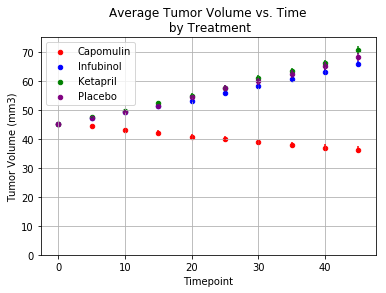

In [326]:
plt.show()

Above, we can see that Capomulin seems to have an effect on Tumor size.

## Metastatic sites over time
This we be the same as above, but for metastatic sites.
- mean is chosen as a summary statistic because sum would be affected by mortality between groups.

In [327]:
drug_time_group = together.groupby(['Drug','Timepoint'])

In [328]:
avmeta = pd.DataFrame(drug_time_group['Metastatic Sites'].agg({'Metastatic Sites': 'mean',
                                                               'Std. Error': 'sem'})).reset_index()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [329]:
capo = avmeta[avmeta['Drug'] == 'Capomulin']
infu = avmeta[avmeta['Drug'] == 'Infubinol']
keta = avmeta[avmeta['Drug'] == 'Ketapril']
plac = avmeta[avmeta['Drug'] == 'Placebo']

In [330]:
ax = capo.plot(x='Timepoint', y='Metastatic Sites', kind='scatter', color='red', label='Capomulin', yerr='Std. Error')
ax2 = infu.plot(x='Timepoint', y='Metastatic Sites', kind='scatter', color='blue', label='Infubinol', ax=ax, yerr='Std. Error')
ax3 = keta.plot(x='Timepoint', y='Metastatic Sites', kind='scatter', color='green', label='Ketapril', ax=ax2, yerr='Std. Error')
plac.plot(x='Timepoint', y='Metastatic Sites', kind='scatter', color='purple', label='Placebo', ax=ax3, yerr='Std. Error')

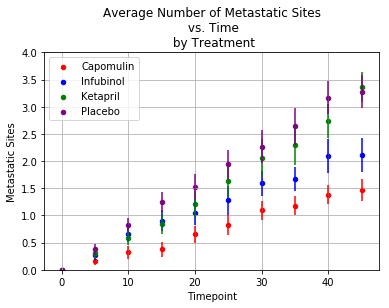

In [331]:
plt.grid()
plt.title('Average Number of Metastatic Sites\n vs. Time\n by Treatment')
plt.ylim(0, 4)
plt.show()

Again, Capomulin treatment seems to produce the greatest reduction of metastatic site number.

## Survival over time
This will be the same as above, but for survival.
- To complete this portion, we will either have to:
  - Add a column to the original joined dataframe for number of surviving mice for each drug at each timepoint, then groupby and use .mean as before, or
  - Use .count() as the summary statistic after grouping.
 
Lets try the latter:

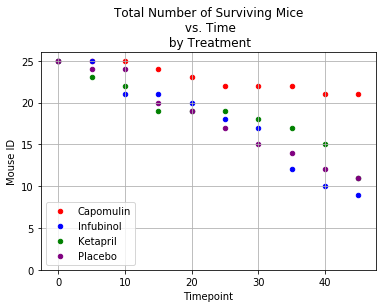

In [333]:
drug_time_group = together.groupby(['Drug','Timepoint'])
# pick any column and count
micenum = pd.DataFrame(drug_time_group['Mouse ID'].count()).reset_index()

capo = micenum[micenum['Drug'] == 'Capomulin']
infu = micenum[micenum['Drug'] == 'Infubinol']
keta = micenum[micenum['Drug'] == 'Ketapril']
plac = micenum[micenum['Drug'] == 'Placebo']

ax = capo.plot(x='Timepoint', y='Mouse ID', kind='scatter', color='red', label='Capomulin')
ax2 = infu.plot(x='Timepoint', y='Mouse ID', kind='scatter', color='blue', label='Infubinol', ax=ax)
ax3 = keta.plot(x='Timepoint', y='Mouse ID', kind='scatter', color='green', label='Ketapril', ax=ax2)
plac.plot(x='Timepoint', y='Mouse ID', kind='scatter', color='purple', label='Placebo', ax=ax3)

plt.grid()
plt.title('Total Number of Surviving Mice\n vs. Time\n by Treatment')
plt.ylim(0, 26)
plt.show()

Again, Capomulin comes out ahead, with the highest survival numbers at timepoint 45.
- if we wanted the survival rate in percent, we could do the following:

In [334]:
drug_time_group = together.groupby(['Drug','Timepoint'])

# pick any column and count
micepct = pd.DataFrame(drug_time_group['Mouse ID'].count()).reset_index()

capo = micepct[micepct['Drug'] == 'Capomulin']
infu = micepct[micepct['Drug'] == 'Infubinol']
keta = micepct[micepct['Drug'] == 'Ketapril']
plac = micepct[micepct['Drug'] == 'Placebo']

origcapo = together[(together['Drug'] == 'Capomulin') & (together['Timepoint'] == 0)]['Mouse ID'].count()
originfu = together[(together['Drug'] == 'Infubinol') & (together['Timepoint'] == 0)]['Mouse ID'].count()
origketa = together[(together['Drug'] == 'Ketapril') & (together['Timepoint'] == 0)]['Mouse ID'].count()
origplac = together[(together['Drug'] == 'Placebo') & (together['Timepoint'] == 0)]['Mouse ID'].count()

In [335]:
capo['Percent Survival'] = capo['Mouse ID'] / origcapo * 100
infu['Percent Survival'] = infu['Mouse ID'] / originfu * 100
keta['Percent Survival'] = keta['Mouse ID'] / origketa * 100
plac['Percent Survival'] = plac['Mouse ID'] / origplac * 100


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

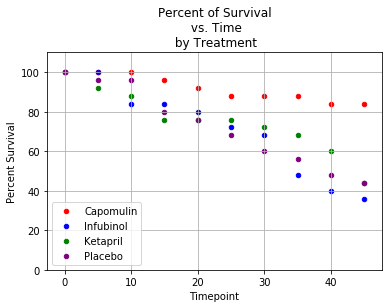

In [336]:
ax = capo.plot(x='Timepoint', y='Percent Survival', kind='scatter', color='red', label='Capomulin')
ax2 = infu.plot(x='Timepoint', y='Percent Survival', kind='scatter', color='blue', label='Infubinol', ax=ax)
ax3 = keta.plot(x='Timepoint', y='Percent Survival', kind='scatter', color='green', label='Ketapril', ax=ax2)
plac.plot(x='Timepoint', y='Percent Survival', kind='scatter', color='purple', label='Placebo', ax=ax3)

plt.grid()
plt.title('Percent of Survival\n vs. Time\n by Treatment')
plt.ylim(0, 110)
plt.show()

This produces a similar result as above.

## Total % tumor volume change:
This will be similar to the above percent survival plot, except that the:
- summary statistic after groupby will be mean tumor volume
- original value will be tumor volume at timepoint zero

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

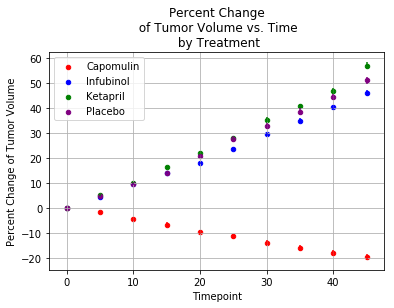

In [337]:
drug_time_group = together.groupby(['Drug','Timepoint'])

# pick any column and count
micepct = pd.DataFrame(drug_time_group['Tumor Volume (mm3)'].agg({'Tumor Volume (mm3)':'mean',
                                                                  'Std. Error': 'sem'})).reset_index()

capo = micepct[micepct['Drug'] == 'Capomulin']
infu = micepct[micepct['Drug'] == 'Infubinol']
keta = micepct[micepct['Drug'] == 'Ketapril']
plac = micepct[micepct['Drug'] == 'Placebo']

origcapo = together[(together['Drug'] == 'Capomulin') & (together['Timepoint'] == 0)]['Tumor Volume (mm3)'].mean()
originfu = together[(together['Drug'] == 'Infubinol') & (together['Timepoint'] == 0)]['Tumor Volume (mm3)'].mean()
origketa = together[(together['Drug'] == 'Ketapril') & (together['Timepoint'] == 0)]['Tumor Volume (mm3)'].mean()
origplac = together[(together['Drug'] == 'Placebo') & (together['Timepoint'] == 0)]['Tumor Volume (mm3)'].mean()

capo['Percent Change of Tumor Volume'] = ((capo['Tumor Volume (mm3)'] - origcapo) / origcapo) * 100
infu['Percent Change of Tumor Volume'] = ((infu['Tumor Volume (mm3)'] - originfu) / originfu) * 100
keta['Percent Change of Tumor Volume'] = ((keta['Tumor Volume (mm3)'] - origketa) / origketa) * 100
plac['Percent Change of Tumor Volume'] = ((plac['Tumor Volume (mm3)'] - origplac) / origplac) * 100

ax = capo.plot(x='Timepoint', y='Percent Change of Tumor Volume', kind='scatter', color='red', label='Capomulin', yerr='Std. Error')
ax2 = infu.plot(x='Timepoint', y='Percent Change of Tumor Volume', kind='scatter', color='blue', label='Infubinol', ax=ax, yerr='Std. Error')
ax3 = keta.plot(x='Timepoint', y='Percent Change of Tumor Volume', kind='scatter', color='green', label='Ketapril', ax=ax2, yerr='Std. Error')
plac.plot(x='Timepoint', y='Percent Change of Tumor Volume', kind='scatter', color='purple', label='Placebo', ax=ax3, yerr='Std. Error')

plt.grid()
plt.title('Percent Change\n of Tumor Volume vs. Time\n by Treatment')

plt.show()

This would give us percent change of tumor volume at each timepoint, but lets zoom in on the last timepoint to discuss the outcome of the study.

First, lets look at one of the subsets we created in the last graph.

In [343]:
capo

,Drug,Timepoint,Tumor Volume (mm3),Std. Error,Percent Change of Tumor Volume
0,Capomulin,0,45.000000,0.000000,0.000000
1,Capomulin,5,44.266086,0.448593,-1.630919
2,Capomulin,10,43.084291,0.702684,-4.257132
3,Capomulin,15,42.064317,0.838617,-6.523739
4,Capomulin,20,40.716325,0.909731,-9.519277
5,Capomulin,25,39.939528,0.881642,-11.245494
6,Capomulin,30,38.769339,0.934460,-13.845913
7,Capomulin,35,37.816839,1.052241,-15.962580
8,Capomulin,40,36.958001,1.223608,-17.871109
9,Capomulin,45,36.236114,1.223977,-19.475303


The information we need is in row index 9, under the Drug and Percent Change of Tumor Volume columns.
- Based on this information, lets create a new dataframe with the information we need.

In [344]:
summary = pd.DataFrame({str(capo.iloc[9,0]): capo.iloc[9,3],
                        str(infu.iloc[9,0]): infu.iloc[9,3],
                        str(keta.iloc[9,0]): keta.iloc[9,3],
                        str(plac.iloc[9,0]): plac.iloc[9,3]}, index=[''])
summary


,Capomulin,Infubinol,Ketapril,Placebo
,1.223977,1.144427,1.453186,1.351726


In [345]:
labels = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
color = ['green', 'red', 'red', 'red']
othersummary.plot(kind='bar', color=color, edgecolor='black', legend=False, width=2)

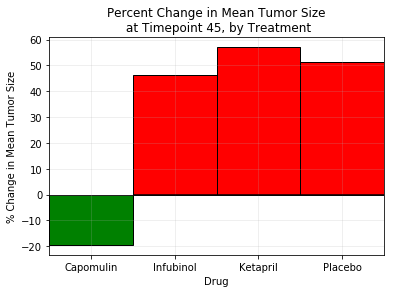

In [346]:
plt.hlines(0, -0.5, 4)
plt.xlim(-1, 1)
plt.xticks([-0.75, -0.25, 0.25, 0.75], labels, rotation=0)
plt.grid(alpha=0.25)
plt.title('Percent Change in Mean Tumor Size\n at Timepoint 45, by Treatment')
plt.ylabel('% Change in Mean Tumor Size')
plt.xlabel('Drug')
plt.show()


## Discussion of Trends
- Of all treatment groups, Capomulin produced the:
  - Greatest reduction in tumor volume
  - Lowest number of metastatic sites
  - Highest survival rate